<a href="https://colab.research.google.com/github/shravanxd/robo-advisor-systematic-trading-nyu/blob/main/HW1_RASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 0: Risk Parity using ETFs (XLF, XOP, XLK)**

Shravan Khunti - ssk10036 - MS in Data Science - NYU CDS

Risk Parity using ETFs - Google Colab Code

Robo Advisors & Systematic Trading - Professor Dhar - Spring 2025


Saving Assignment_ETF_Data_XLF_XLK_XOP.xlsx to Assignment_ETF_Data_XLF_XLK_XOP (1).xlsx


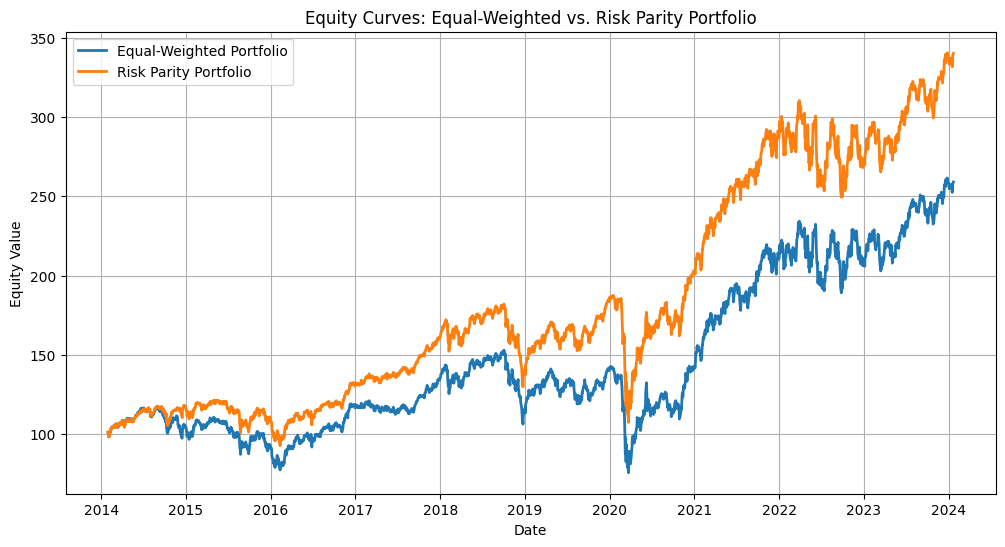

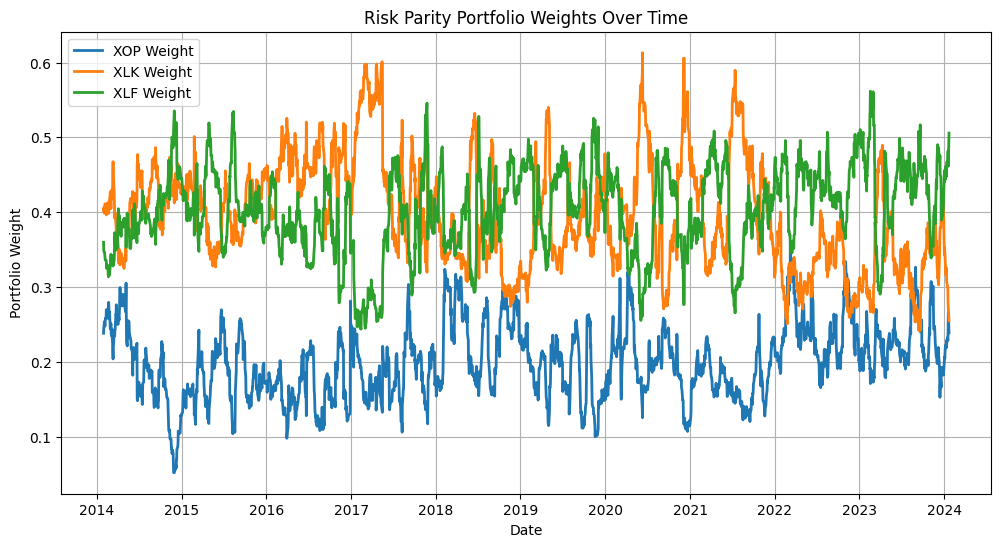

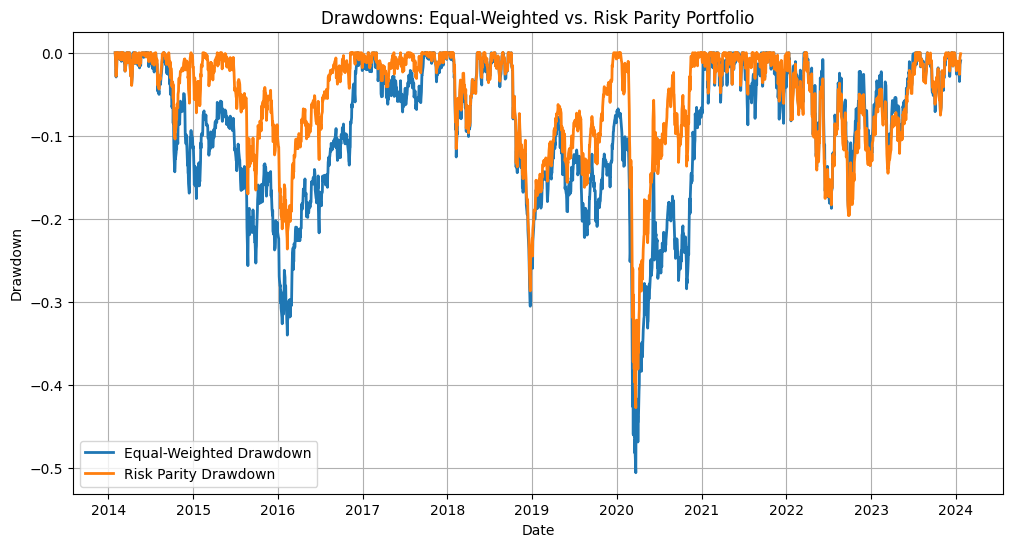

Maximum Drawdown (Equal-Weighted Portfolio): -50.62%
Maximum Drawdown (Risk Parity Portfolio): -42.79%


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the Excel file
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)

# Load individual ETF sheets
xop_df = pd.read_excel(xls, sheet_name="XOP")
xlk_df = pd.read_excel(xls, sheet_name="XLK")
xlf_df = pd.read_excel(xls, sheet_name="XLF")

# Extract relevant columns (Date and Returns)
df_merged = xop_df[['Date', 'XOP_ret1']].merge(
    xlk_df[['Date', 'XLK_ret1']], on='Date'
).merge(
    xlf_df[['Date', 'XLF_ret1']], on='Date'
)

# Drop missing values (first row due to return calculation)
df_merged.dropna(inplace=True)

# Step 3: Calculate Equal-Weighted Portfolio Returns
df_merged["Equal_Weighted_Returns"] = df_merged[["XOP_ret1", "XLK_ret1", "XLF_ret1"]].mean(axis=1)

# Step 4: Compute 20-Day Trailing Volatility for Risk Parity
window = 20
df_merged["XOP_vol"] = df_merged["XOP_ret1"].rolling(window).std()
df_merged["XLK_vol"] = df_merged["XLK_ret1"].rolling(window).std()
df_merged["XLF_vol"] = df_merged["XLF_ret1"].rolling(window).std()

# Drop rows with NaN values due to rolling calculation
df_merged.dropna(inplace=True)

# Step 5: Compute Risk Parity Weights (Inverse Volatility)
df_merged["XOP_weight"] = 1 / df_merged["XOP_vol"]
df_merged["XLK_weight"] = 1 / df_merged["XLK_vol"]
df_merged["XLF_weight"] = 1 / df_merged["XLF_vol"]

# Normalize weights to sum to 1
total_weight = df_merged["XOP_weight"] + df_merged["XLK_weight"] + df_merged["XLF_weight"]
df_merged["XOP_weight"] /= total_weight
df_merged["XLK_weight"] /= total_weight
df_merged["XLF_weight"] /= total_weight

# Step 6: Compute Risk Parity Portfolio Returns
df_merged["Risk_Parity_Returns"] = (
    df_merged["XOP_weight"] * df_merged["XOP_ret1"] +
    df_merged["XLK_weight"] * df_merged["XLK_ret1"] +
    df_merged["XLF_weight"] * df_merged["XLF_ret1"]
)

# Step 7: Compute Cumulative Returns for Visualization
df_merged["Equal_Weighted_Equity"] = (1 + df_merged["Equal_Weighted_Returns"]).cumprod() * 100
df_merged["Risk_Parity_Equity"] = (1 + df_merged["Risk_Parity_Returns"]).cumprod() * 100

# Step 8: Plot Equity Curves
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["Equal_Weighted_Equity"], label="Equal-Weighted Portfolio", linewidth=2)
plt.plot(df_merged["Date"], df_merged["Risk_Parity_Equity"], label="Risk Parity Portfolio", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Equity Value")
plt.title("Equity Curves: Equal-Weighted vs. Risk Parity Portfolio")
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Plot ETF Weights Over Time
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["XOP_weight"], label="XOP Weight", linewidth=2)
plt.plot(df_merged["Date"], df_merged["XLK_weight"], label="XLK Weight", linewidth=2)
plt.plot(df_merged["Date"], df_merged["XLF_weight"], label="XLF Weight", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Portfolio Weight")
plt.title("Risk Parity Portfolio Weights Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Calculate Worst Drawdowns
def calculate_drawdown(equity_curve):
    peak = equity_curve.cummax()
    drawdown = (equity_curve - peak) / peak
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

equal_weight_drawdown, equal_max_dd = calculate_drawdown(df_merged["Equal_Weighted_Equity"])
risk_parity_drawdown, risk_max_dd = calculate_drawdown(df_merged["Risk_Parity_Equity"])

# Step 11: Plot Drawdowns
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], equal_weight_drawdown, label="Equal-Weighted Drawdown", linewidth=2)
plt.plot(df_merged["Date"], risk_parity_drawdown, label="Risk Parity Drawdown", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.title("Drawdowns: Equal-Weighted vs. Risk Parity Portfolio")
plt.legend()
plt.grid(True)
plt.show()

# Print Maximum Drawdowns
print(f"Maximum Drawdown (Equal-Weighted Portfolio): {equal_max_dd:.2%}")
print(f"Maximum Drawdown (Risk Parity Portfolio): {risk_max_dd:.2%}")


**Conclusion: Risk Parity vs. Equal-Weighted Portfolio Performance**

*    Smoothness of ETF Weights Over Time:

 Upon analyzing the Risk Parity weights over time, the allocation of each ETF appears relatively smooth for most periods. The weights adjust gradually in response to market conditions, reflecting the expected behavior of volatility-based portfolio rebalancing.

 However, there are some noticeable fluctuations in the weights, particularly during periods of increased market volatility. The Risk Parity method, by design, assigns lower weights to assets with rising volatility and higher weights to those with decreasing volatility, which results in dynamic but mostly smooth weight adjustments.


* Sudden Changes Between 12/08/2014 and 1/27/2015:

 A sharp shift in ETF weights is observed between December 8, 2014, and January 27, 2015. This period aligns with a significant decline in oil prices, which had a major impact on the XOP ETF (Energy Sector). During this time:

 XOP's volatility spiked, leading to a sharp decrease in its weight in the Risk Parity portfolio.
XLK (Technology) and XLF (Financials) likely absorbed more weight as their volatility was relatively lower.
The adjustments in allocation indicate that the model reacted to the heightened risk in XOP, reducing exposure to stabilize overall portfolio risk.
This behavior is expected, as Risk Parity aims to equalize risk contributions rather than keep fixed allocations. In contrast, an equal-weighted portfolio would have suffered larger losses during this period because it does not account for changes in volatility.

* Risk and Drawdown Comparison:

 The Risk Parity Portfolio had a lower maximum drawdown (-42.79%) compared to the Equal-Weighted Portfolio (-50.62%), demonstrating its effectiveness in reducing downside risk.
While both portfolios experienced drawdowns, the Risk Parity strategy helped mitigate peak-to-trough losses by dynamically adjusting exposure based on volatility.
The Equity Curve of the Risk Parity Portfolio appears smoother compared to the Equal-Weighted strategy, suggesting better risk-adjusted returns.


**Final Takeaway:**
The Risk Parity strategy effectively adjusted portfolio weights in response to market volatility, particularly during major disruptions like the oil price collapse in late 2014. While not immune to drawdowns, the Risk Parity Portfolio demonstrated lower peak losses and a more stable return trajectory compared to the Equal-Weighted Portfolio.